#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

### Start med å importere modulene

In [4]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\nbtext.py`

# Aggregerte data, trendlinjer og ordmodeller fra ngram




### Trendlinjer 

Data inntil trigram.

In [5]:
nb.nb_ngram("spise middag, lage middag", years=(1990, 2010), smooth=1).head()

spise middag  lage middag
1990      0.000283     0.000057
1991      0.000372     0.000074
1992      0.000202     0.000042
1993      0.000186     0.000048
1994      0.000146     0.000037

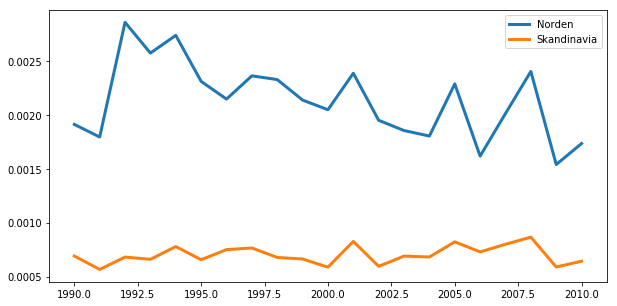

In [6]:
nb.nb_ngram("Norden, Skandinavia", years=(1990, 2010), smooth=1).plot(figsize=(10,5), lw=3)

### Ordmodeller

Enkeltord - kapitaliseringssensitiv

In [7]:
G = nb.make_graph('Norden', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


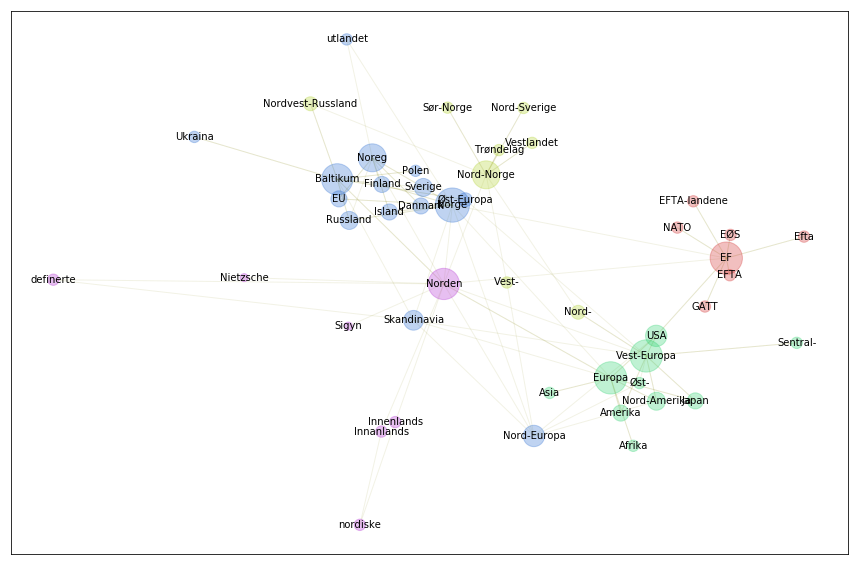

In [12]:
gnl.show_graph(G, spread = 1.3)

In [9]:
G1 = nb.make_graph('Skandinavia', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


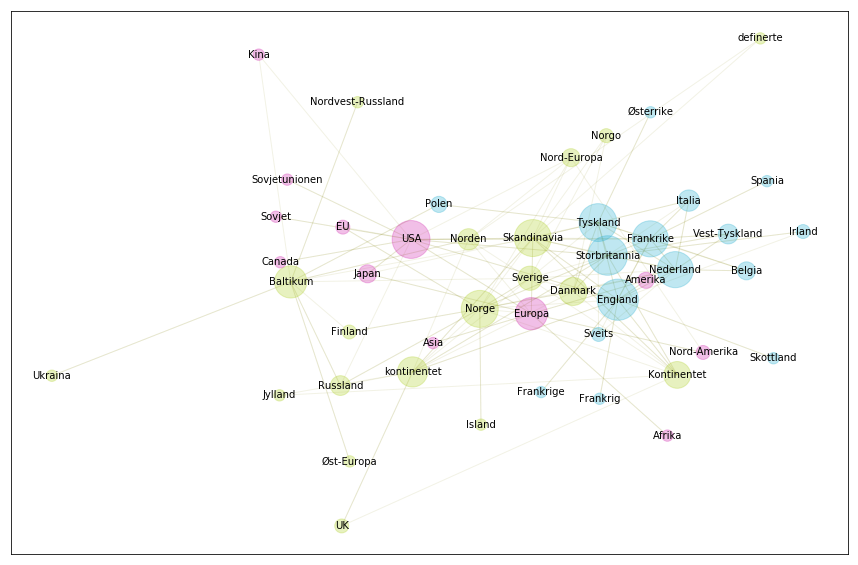

In [10]:
gnl.show_graph(G1, spread = 1.9)

In [33]:
G2 = nb.make_graph('Skandinavia, Norden', cutoff = 10)

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


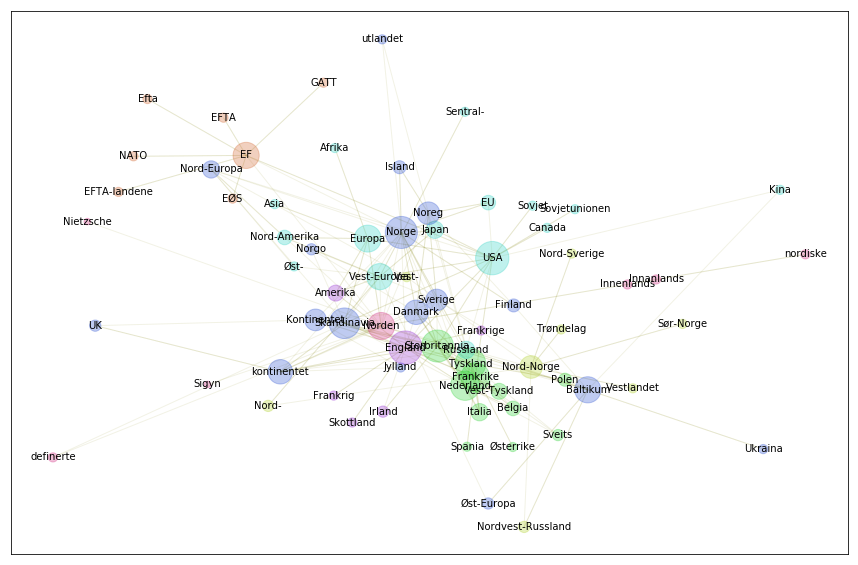

In [36]:
gnl.show_graph(G2, spread = 1.5)

In [31]:
skandinavia = nb.relaterte_ord('Skandinavia', number=50, score=True)

In [16]:
norden = nb.relaterte_ord('Norden', number=50, score=True)

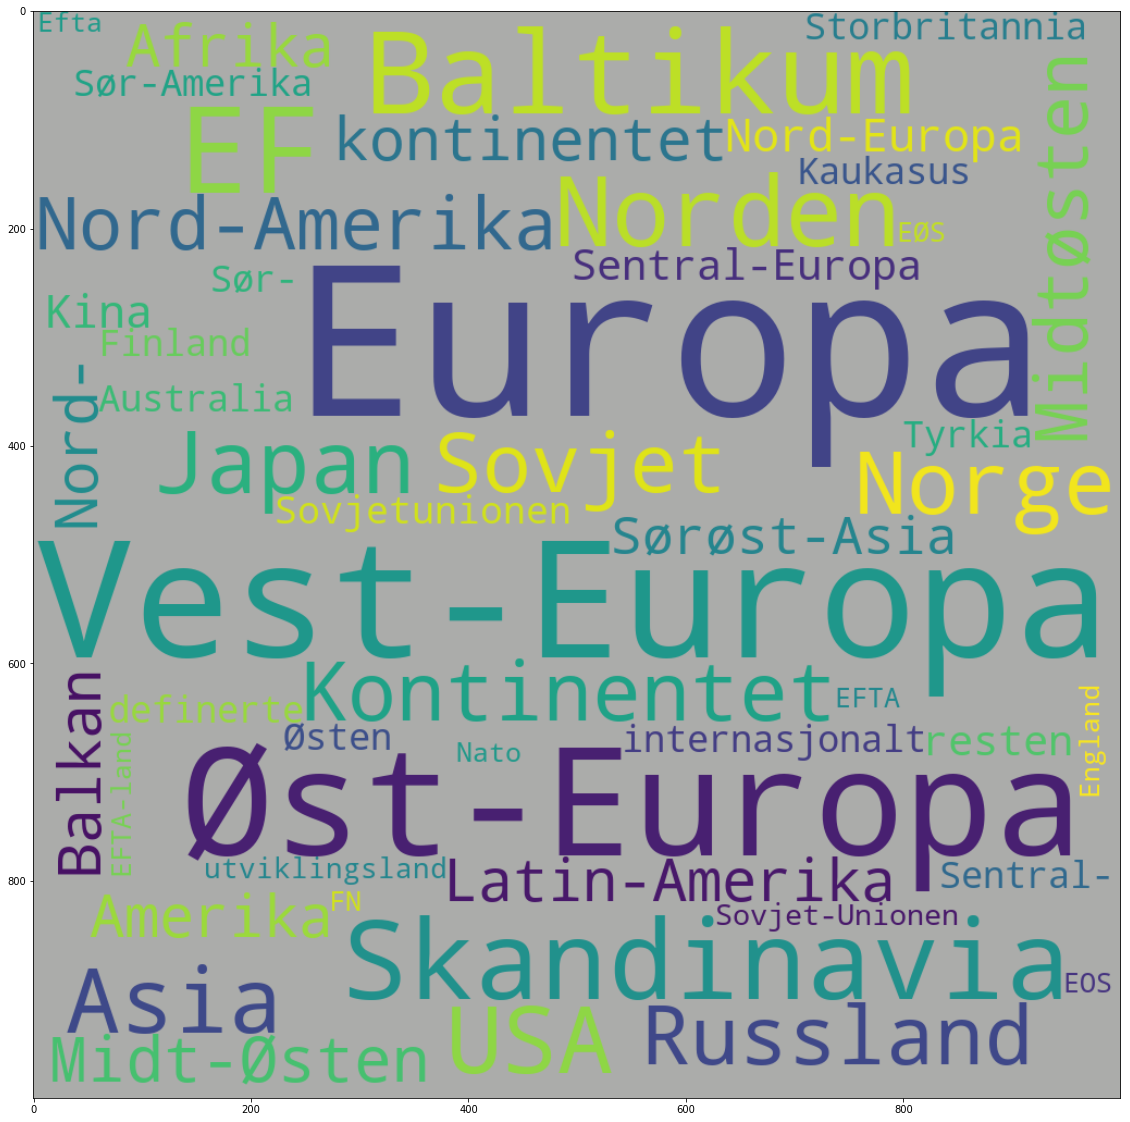

In [30]:
nb.cloud(nb.frame(dict(norden)), background='#ABACAA')

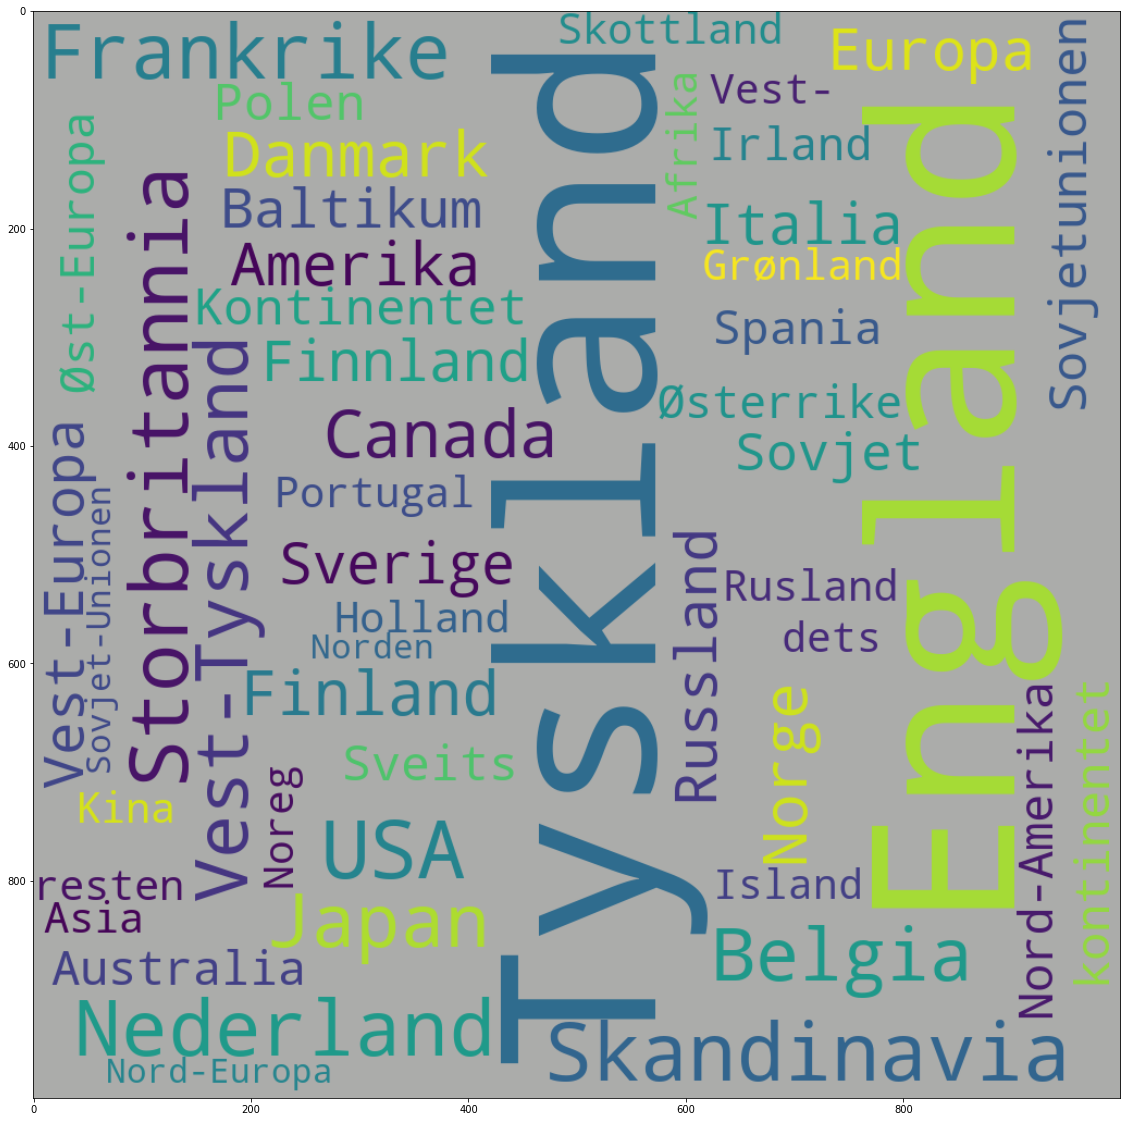

In [32]:
nb.cloud(nb.frame(dict(skandinavia)), background='#ABACAA')

In [37]:
korp_norden = nb.get_urn({'words':['Norden','Nordisk','Nordiske'], 'year':1800, 'next':100, 'limit':200})

In [41]:
ref_1800 = nb.get_urn({'year':1800, 'next':100, 'limit':200})

In [42]:
total = nb.get_aggregated_corpus(ref_1800)

In [39]:
coll_norden = nb.urn_coll('Norden', urns=korp_norden, before=5, after=5)

In [40]:
coll_norden

0
,                670
i                609
.                431
og               278
det              147
til              122
at               115
for              113
den              110
som               89
fra               88
en                84
der               83
er                76
af                75
var               71
;                 60
de                59
mod               56
over              46
sig               45
I                 44
!                 44
nach              43
von               41
havde             41
her               40
hele              40
)                 39
paa               39
...              ...
Svein              1
Svensk             1
Svenske            1
Svenskernes        1
Studia             1
Struense-Epoken    1
Stedfortræder      1
Strome             1
Stellung           1
Stemme             1
Stemning           1
Steppenlander      1
Steurenberg        1
Stevne             1
Stifmoder,         1
Stilicho           1
Stjerneglimt       1
Stoeder            1
Stolkonge          1
Storbritaniens     1
Stormvind          1
Stotte             1
Straaler           1
Straalernes        1
Strassburg         1
Streifen           1
Strich             1
Strid              1
Strom              1
brcrnd             1

[3694 rows x 1 columns]

In [108]:
coll = nb.urn_coll('frost', urns= iskorpus, before=4, after=4)

In [109]:
coll.sort_values(by=0, ascending=False).head()

0
.    27
og   20
,    19
med  16
for  14

# Bygg med biblioteksdata

In [27]:
korpus = nb.get_urn({'ddk':"641%", 'limit':50})
korpus[:5]

[[2010071303010, 'Vardøen, Jan', 'Bar boka', 1999],
 [2008010800028, '', 'Innlandsmat', 1993],
 [2008102304001, '', 'Cuisine des vikings', 2000],
 [2008012100037, '', 'Mat for helse og trivsel', 1993],
 [2014030548040, 'Cadogan, Mary', 'Alt om matlaging', 1982]]

Ta et uttrekk av setninger

In [31]:
Sentences = nb.sentences(korpus, num = 1000)
Sentences[:10]

['Å FLETTE LAKS ER LETTERE ENN DET SER UT TIL',
 'Varm blandingen opp til kokepunktet og fordel den på kokte flasker med kokte redskaper , og dekk til med kokte gummihetter eller kokte korker',
 'Fyll :',
 'Spesifikt for kvinnenes situasjon ved praktisering av modellen er at de utfører ulønnet omsorgsarbeid slik at de blir økonomisk avhengige av sine ektefellers inntekt',
 'Sildesalat',
 'Da kan alle helt fordomsfritt konsentrere seg om',
 'Ui \\',
 'Legeplante',
 'Problemet er bare at vi forskyver ting til neste dag og at avhengigheten til alkohol kan komme krypende',
 'Til dette punktet likner de svært på koteletter alla milanese , men det er ikke slutt ennå']

Setningene er ferdig tokenisert, så en .split() holder for å hente ut tokener.

In [33]:
SCount = Counter()
for s in Sentences:
    SCount.update(s.split())

Se på de mest frekvente

In [34]:
SCount.most_common(10)

[(',', 446),
 ('og', 397),
 ('i', 331),
 ('med', 186),
 ('er', 157),
 ('en', 149),
 ('til', 145),
 ('på', 129),
 ('det', 126),
 ('av', 122)]

Sammenlign med totalen av ord

In [35]:
# den her tar litt tid ...
tot = nb.totals(top=20000)

Inneholder alle ordene fra bøker i NB-digital

In [41]:
totalen = nb.frame(tot)
totalen.head()

0
.    1265723110
,    1105303412
og    543432056
i     460246057
det   273411583

In [45]:
df_SCount = nb.frame(SCount).sort_values(by= 0, ascending=False)
df_SCount.head()

0
,    446
og   397
i    331
med  186
er   157

In [51]:
diff = (df_SCount/totalen).sort_values(by=0, ascending = False)
diff.head()

0
Smak    0.000135
sausen  0.000116
Server  0.000102
Stek    0.000095
Rør     0.000087

## Tegn ordsky av resultatet

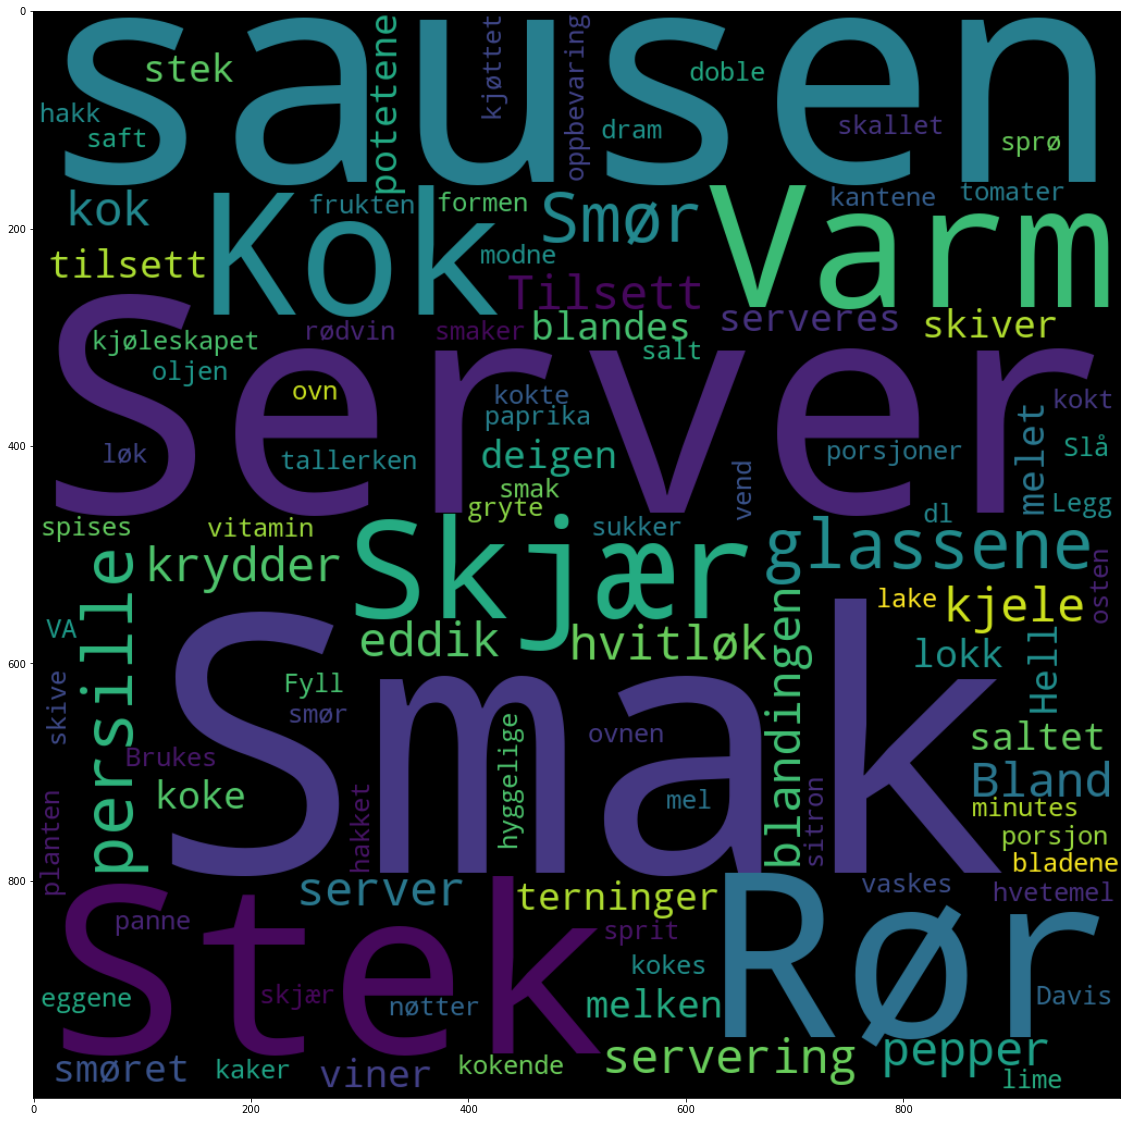

In [52]:
nb.cloud(diff[:100])

In [110]:
isdiff = (coll/totalen).sort_values(by=0, ascending = False)
isdiff.head(20)

0
antal        0.000030
døgn         0.000025
sne          0.000014
frosne       0.000013
flom         0.000013
følsom       0.000013
førend       0.000012
våndet       0.000012
Efterat      0.000012
træ          0.000011
absolut      0.000011
kl.          0.000010
årlige       0.000009
frykte       0.000009
hænder       0.000008
foregaaende  0.000008
grund        0.000008
føtter       0.000007
em           0.000007
sult         0.000007

# Dokument-term-matriser

In [59]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in _27])

In [63]:
nb.heatmap(dtm.sort_values(by = dtm.columns[1], ascending = False)[:50])

# Analyse - viktigste ord

In [53]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

In [54]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

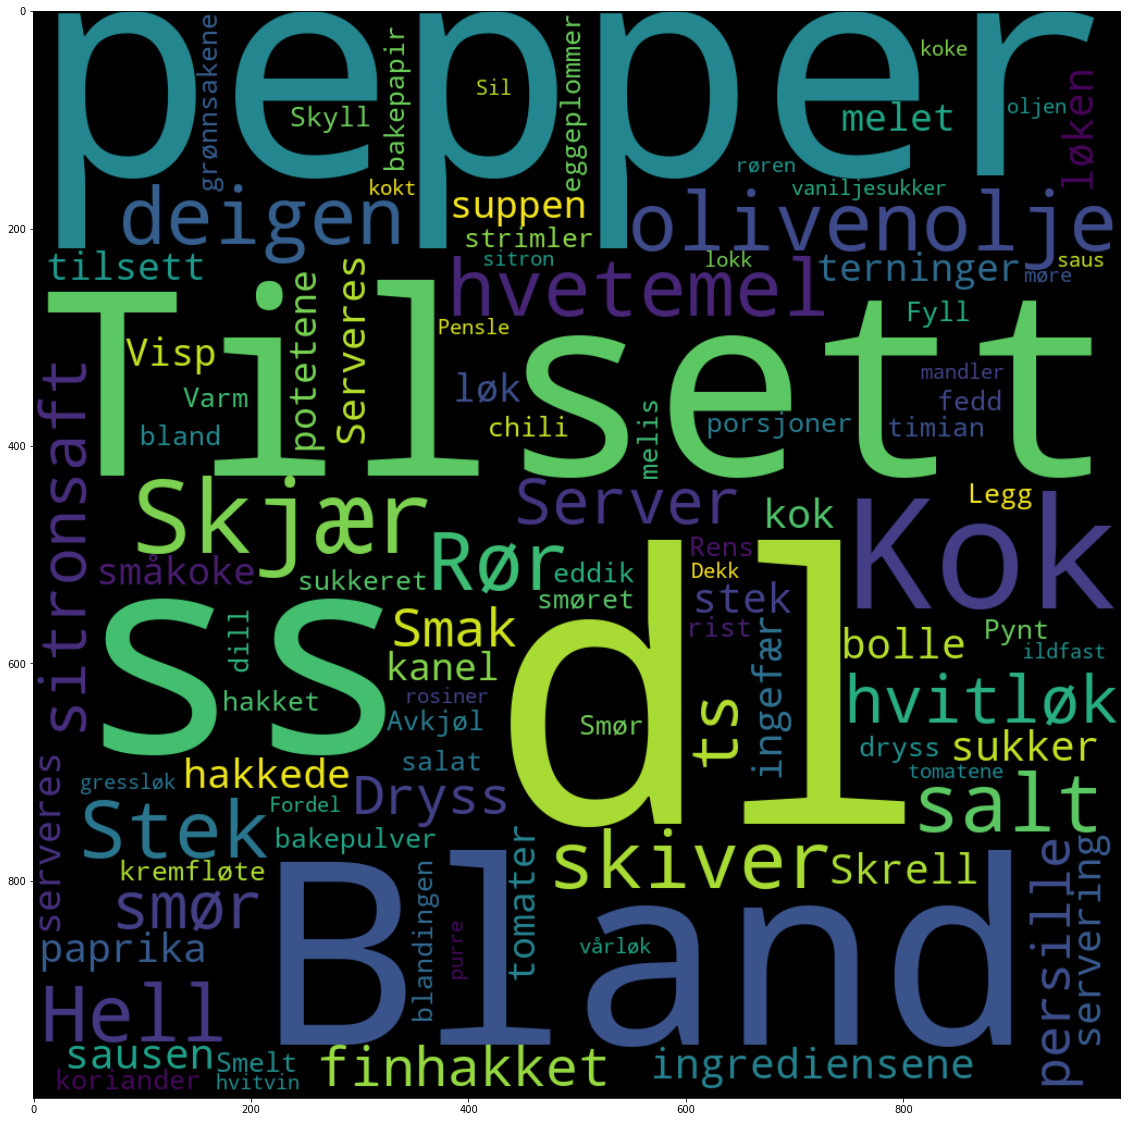

In [57]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [112]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [113]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

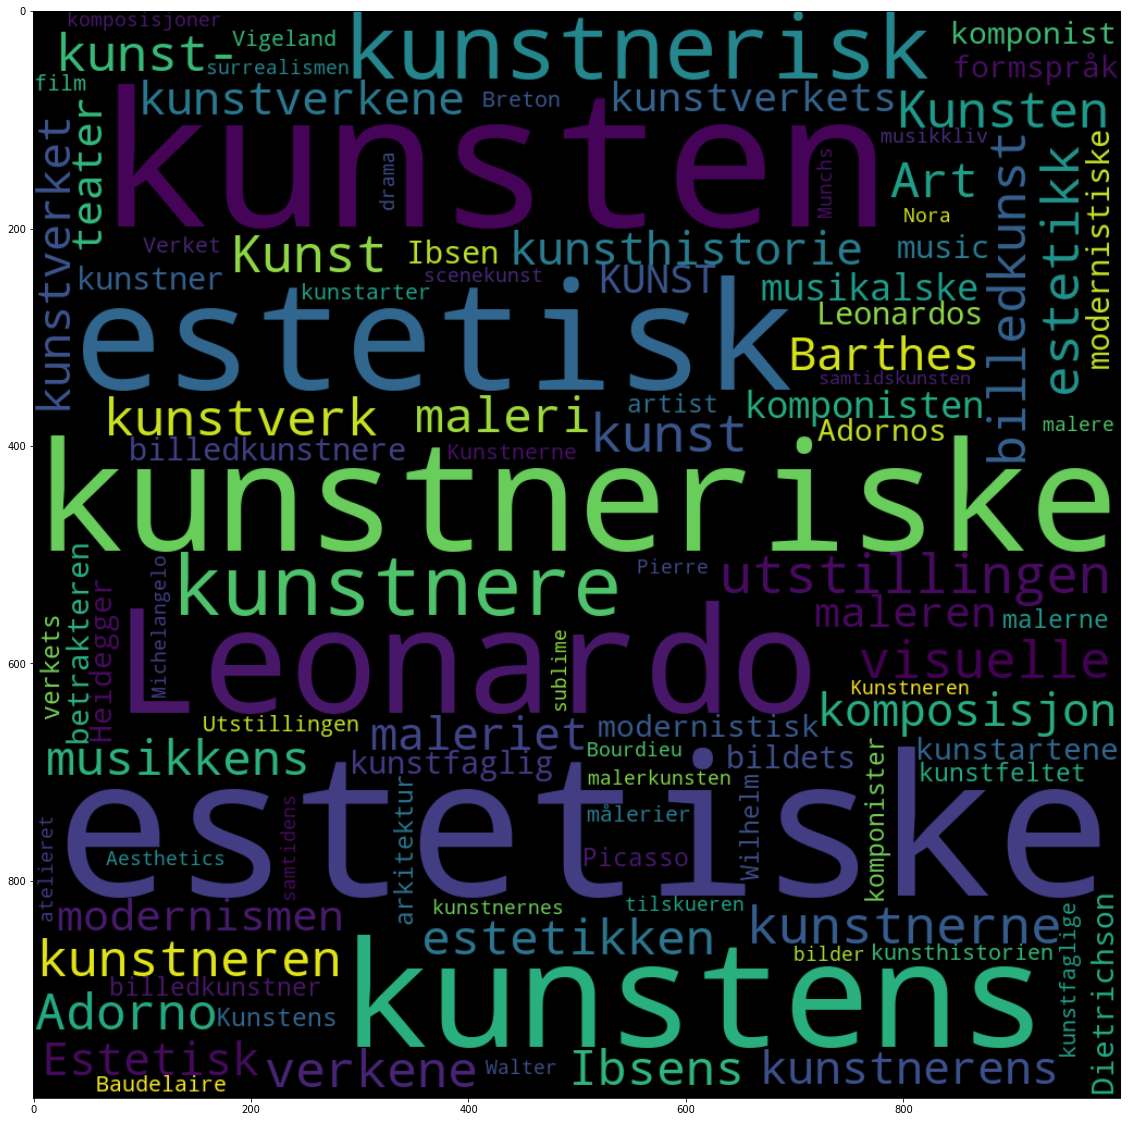

In [114]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [115]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [116]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

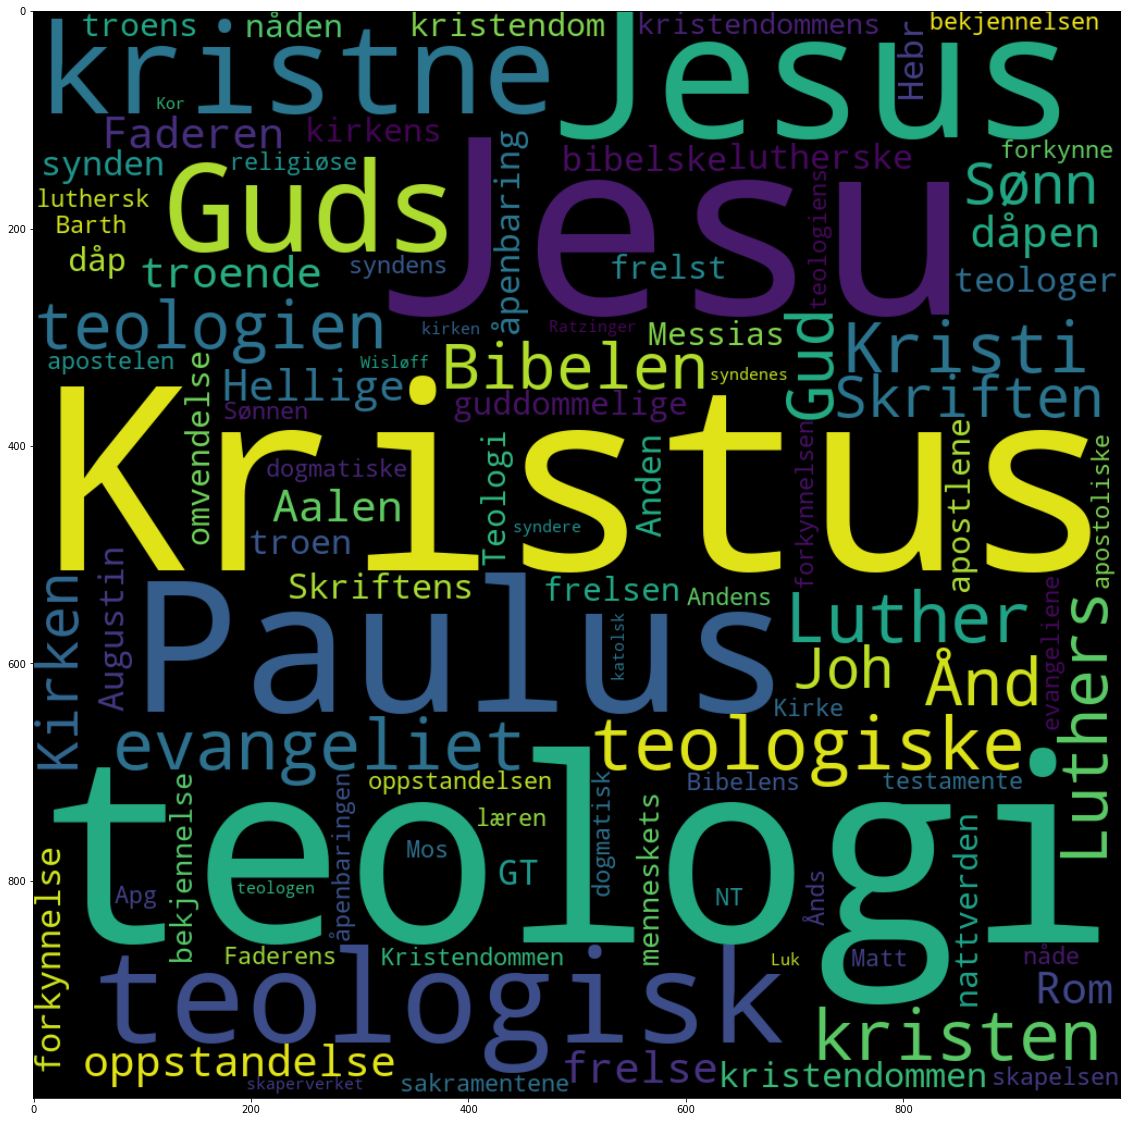

In [117]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [119]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

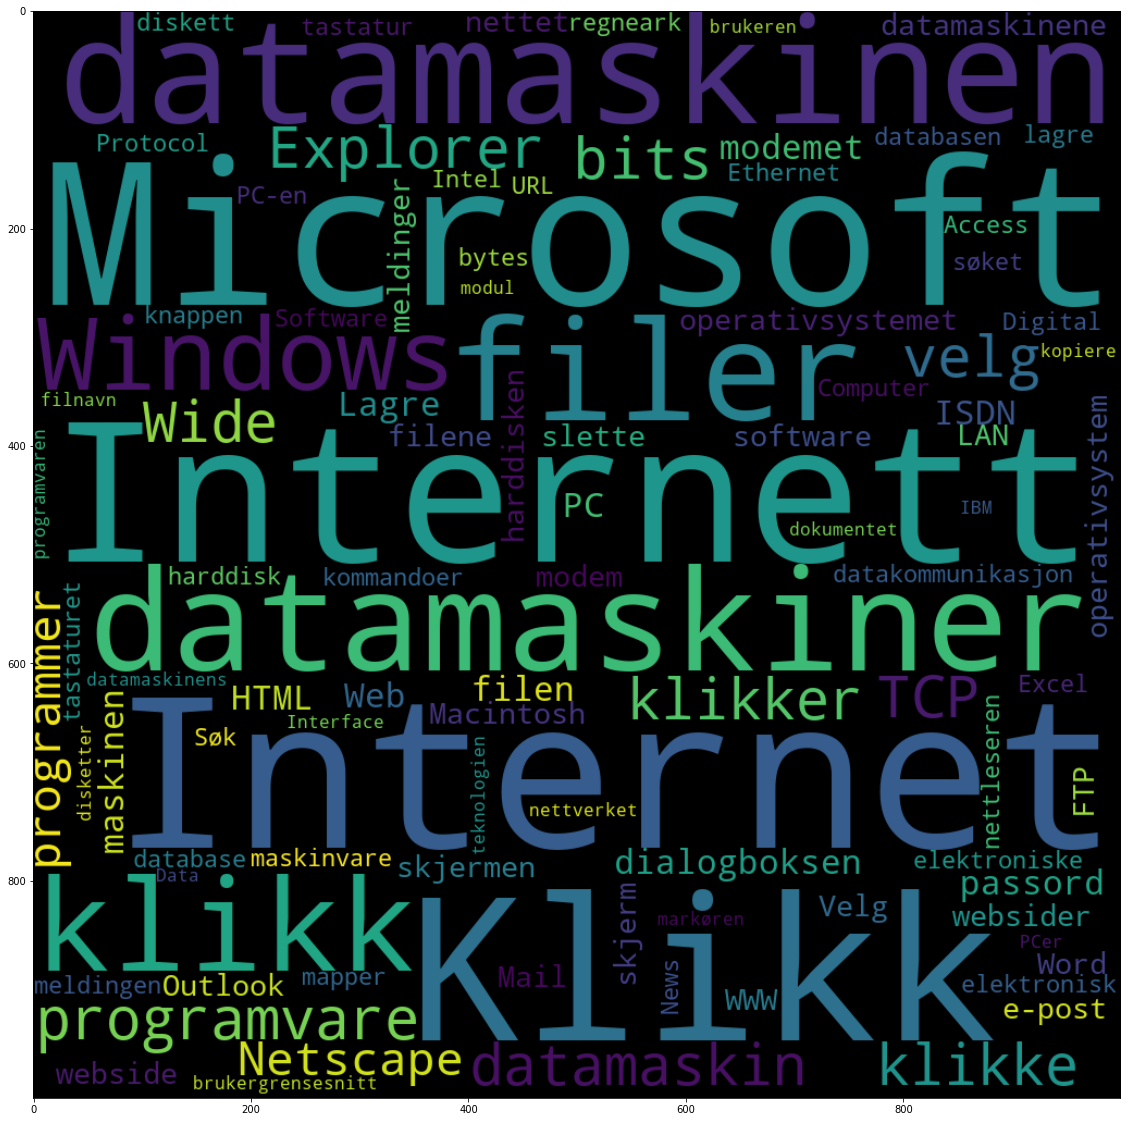

In [120]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])